In [1]:
from model.diffusion import FEADataset, Trainer

/home/namanwsl/code/fea-diffusion/model/diffusion.py:3: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from tqdm.autonotebook import tqdm


In [2]:
dataset = FEADataset(
    folder='data/feadata2500',
    augmentation=False,
)
print(len(dataset))

100000


In [3]:
# from tqdm.auto import tqdm
# startindex = 0
# errors = []
# for i in tqdm(range(startindex, len(dataset)), total=len(dataset), initial=startindex):
#     plate_index = (i // (dataset.samples_per_plate)) + 1
#     try:
#         x = dataset[i]
#     except Exception as e:
#         errors.append(plate_index) if plate_index not in errors else None

In [4]:
# print(len(errors))
# print(errors)

In [5]:
import torchvision.transforms.functional as TF
import torch
def unnormalize_from_negative_one_to_one(tensor):
        return (tensor + 1.0) / 2.0
def create_view_friendly_image(image):
        image = unnormalize_from_negative_one_to_one(image)
        image = image * 255.0
        # image = TF.invert(image)
        # image = image.repeat(3, 1, 1)
        return image
        # image = TF.to_pil_image(image)

In [10]:
index = 1000
sample = dataset[index]
# for key, value in sample.items():
    # print(key, value.shape)
print(sample['plate_index'], sample['condition_index'], sample['iteration_index'])

tensor(26) tensor(1) tensor(1)


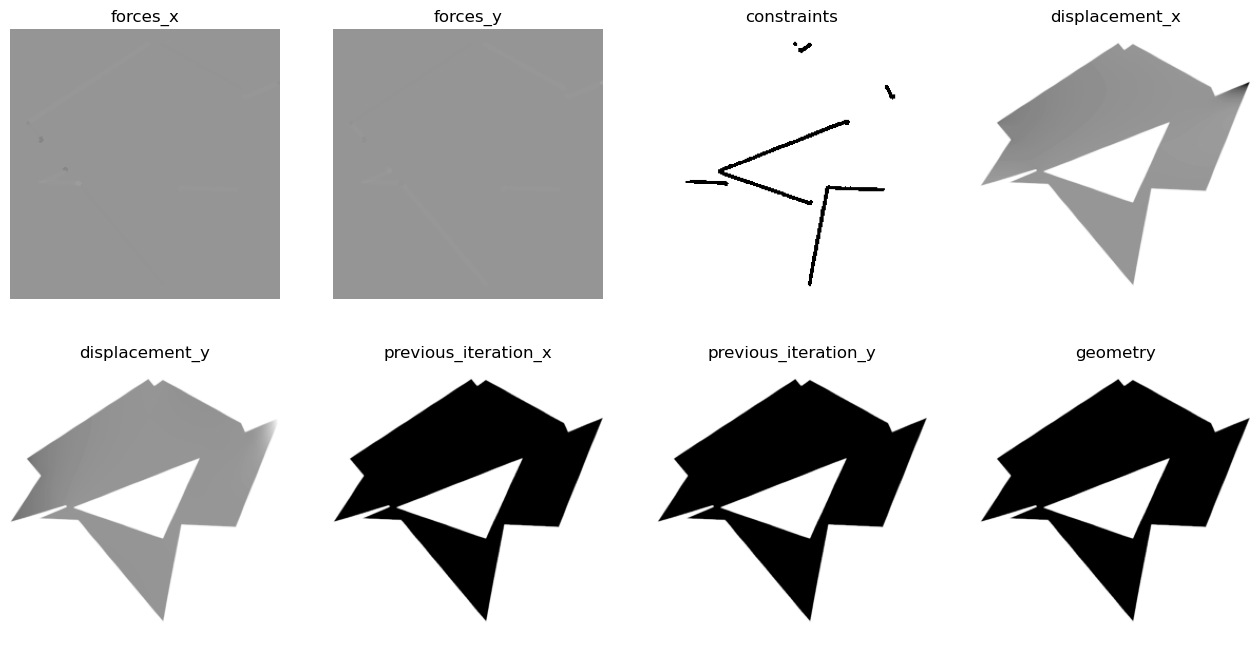

In [11]:
import matplotlib.pyplot as plt
figure = plt.figure(figsize=(16, 8))
index = 1
for key, value in reversed(sample.items()):
    if value.shape.numel() == 1:
        continue
    if value.shape[0] == 2:
        figure.add_subplot(2, 4, index)
        plt.title(key + "_x")
        plt.axis("off")
        plt.imshow(create_view_friendly_image(value[0][None, ...]).squeeze(), cmap='Greys')
        plt.clim(0, 255)
        # plt.colorbar()
        index += 1
        figure.add_subplot(2, 4, index)
        plt.title(key + "_y")
        plt.axis("off")
        plt.imshow(create_view_friendly_image(value[1][None, ...]).squeeze(), cmap='Greys')
        plt.clim(0, 255)
        # plt.colorbar()
        index += 1
    else:
        figure.add_subplot(2, 4, index)
        plt.title(key)
        plt.axis("off")
        plt.imshow(create_view_friendly_image(value[0][None, ...]).squeeze(), cmap='Greys')
        plt.clim(0, 255)
        # plt.colorbar()
        index += 1
        